In [2]:
import geojson
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patheffects as path_effects

import cartopy.crs as ccrs
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker

import matplotlib.pyplot as plt
import logging
import hikinggc
from importlib import reload
reload(hikinggc)

fontawesome, fontreg, fontbold = hikinggc.load_fonts()
plt.style.use("./hiking.mplstyle")

## Files and directories

In [3]:
figdir = os.path.join(hikinggc.figdir, "maps")
if not os.path.exists(figdir):
    os.mkdir(figdir)
datadir = hikinggc.datadir
datafile1 = os.path.join(datadir, "ProvinciaLasPalmas.geojson")
datafile2 = os.path.join(datadir, "ProvinciaSantaCruz.geojson")
municipiosfile = os.path.join(hikinggc.datadir, "municipiosGC.json")
municipios = hikinggc.Municipios()
municipios.get_from_json(municipiosfile)
CI = hikinggc.Island(hikinggc.iccoords)
os.path.isfile(datafile1) & os.path.isfile(datafile2)

True

In [4]:
islandnames = [
    (-17.8, 29., 'La Palma'),
    (-18., 28., 'El Hierro'),
    (-17.35, 28.35, 'La Gomera'),
    (-16.7, 28.6, 'Tenerife'),
    (-15.6, 28.3, 'Gran Canaria'),
    (-14.65, 28.5, 'Fuerteventura'),
    (-14.1, 29.15, 'Lanzarote')
]

## Make plots

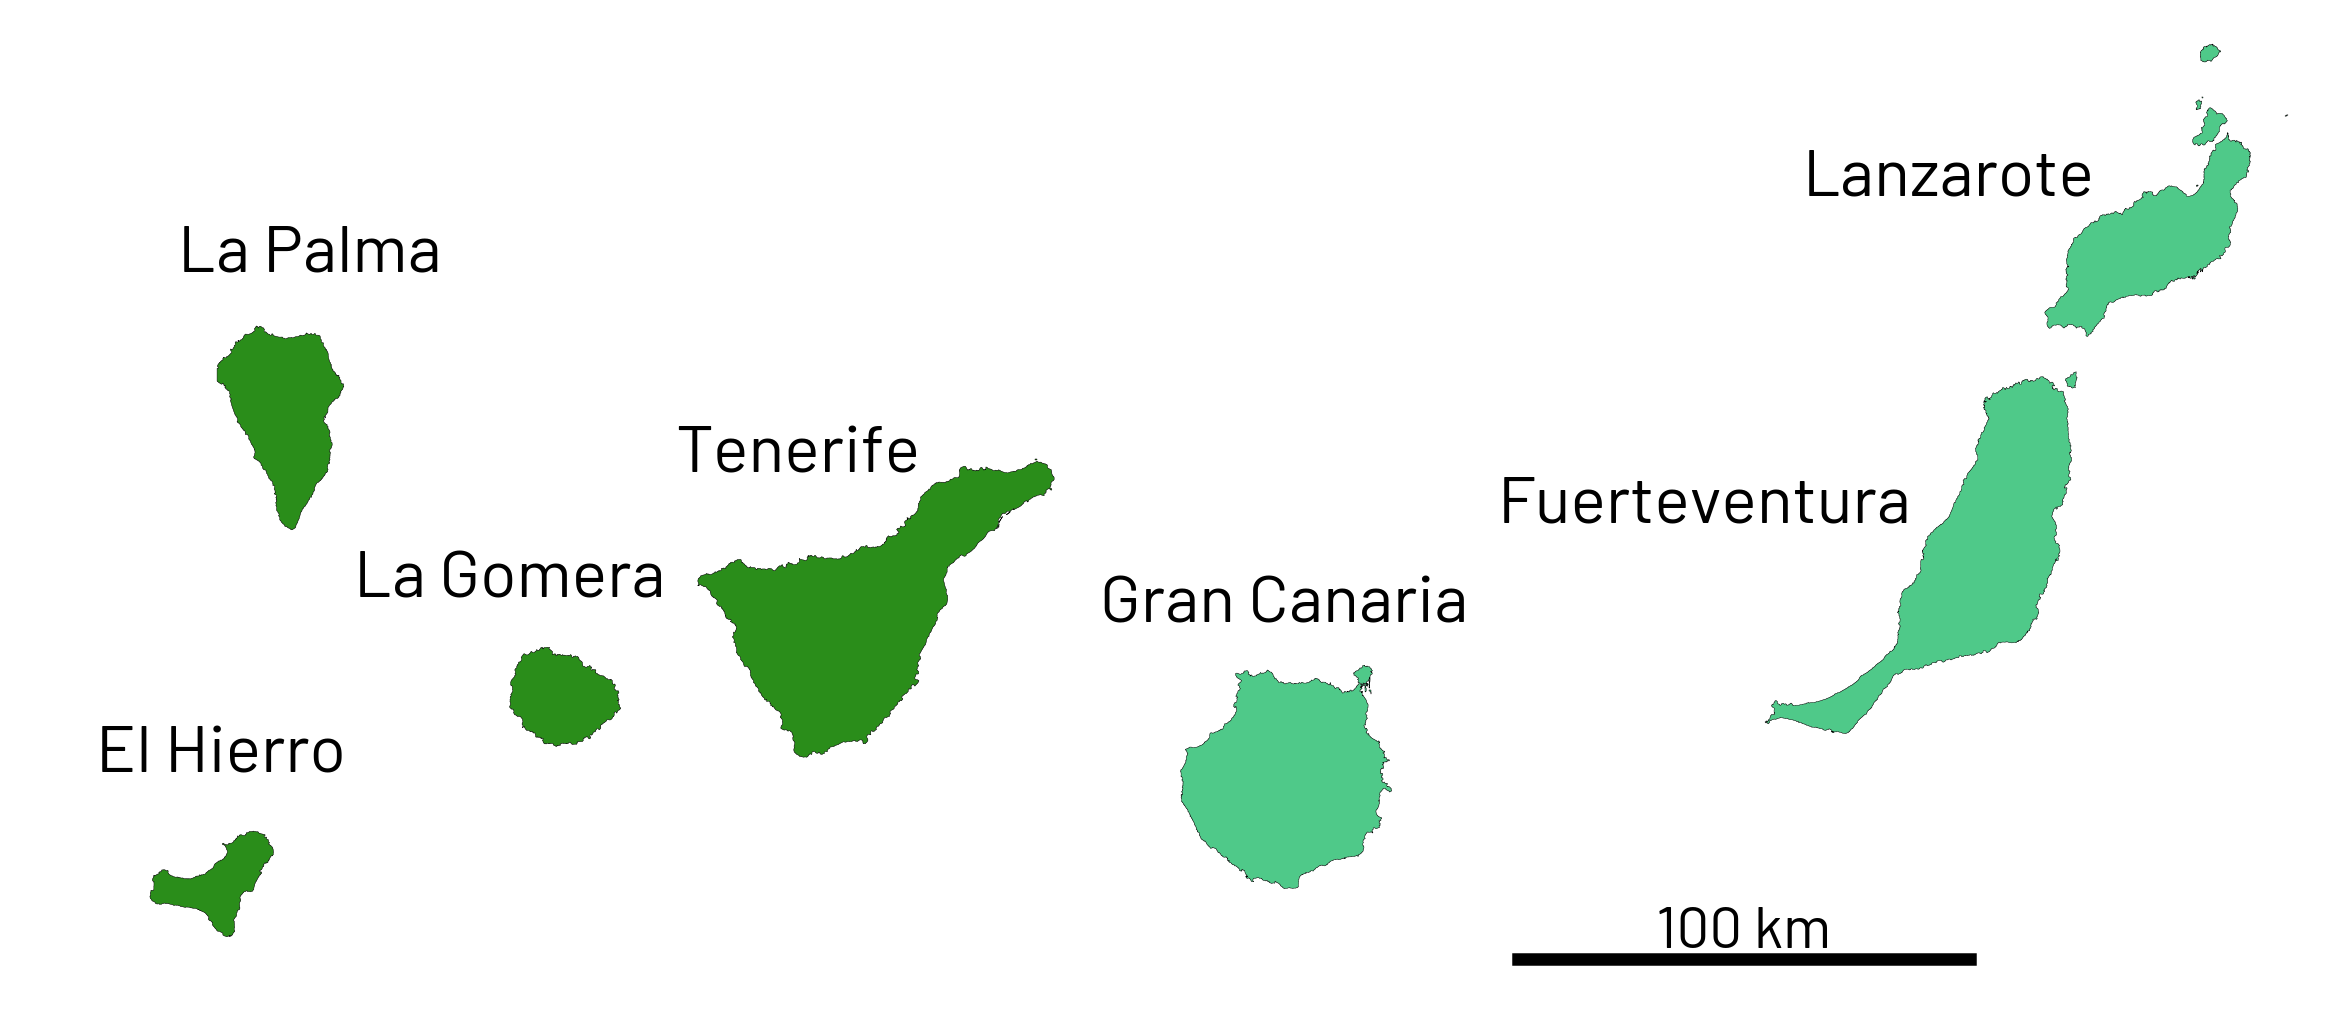

In [18]:
fig = plt.figure()
ax = plt.subplot(111, projection=CI.proj)

# Add Las Palmas province
hikinggc.plot_province(datafile1, ax, color=hikinggc.secondgreen)
hikinggc.plot_province(datafile2, ax, color=hikinggc.maingreen)

# Add names
for islandname in islandnames:
    text = ax.text(islandname[0], islandname[1], islandname[2], color="k", 
                   ha='center', va="center", fontproperties=fontreg,
                   fontsize=16, transform=hikinggc.data_crs)
ax.set_extent(CI.bbox)
ax.spines['geo'].set_color("w")

hikinggc.scale_bar(ax, CI.proj, length=None, location=(0.75, 0.05), linewidth=3, fs=14)
plt.savefig(os.path.join(figdir, "islascanarias.pdf"))
plt.show()
plt.close()

## Protected areas

In [13]:
colordict = {"Monumentos Naturales": "#004078",
             "Paisaje Protejido": "#80A0BD",
             "Parque Natural": "#F78000",
             "Parque Rural": "#E60000",
             "Reserva Natural Especial": "#00913F",
             "Reserva Natural Integral": "#034A31",
             "Sitio de Interés Cientifico": "#BADBCA"
            }
colordictf = {"Parcs Naturels": "#F78000",
             "Monuments Naturels": "#004078",
             "Paysages Protégés": "#80A0BD",
             "Parc Ruraux": "#E60000",
             "Réserves Naturelles Spéciales": "#00913F",
             "Réserves Naturelles Intégrales": "#034A31",
             "Sites d'Intérêt Scientifique": "#BADBCA"
            }

In [14]:
def add_legend(colordict, ax):

    for k, v in colordict.items():
        ax.plot(0., 0., "s", color=v, markersize=7, label=k)
    plt.legend(loc=2, edgecolor="w", prop={'family':fontreg.get_name(), 'size':6})

In [3]:
GC = hikinggc.Island(hikinggc.gccoords)

In [4]:
GC.proj

<Derived Projected CRS: +proj=merc +ellps=WGS84 +lon_0=-15.605 +x_0=0.0 +y ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Mercator (variant B)
Datum: Unknown based on WGS84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

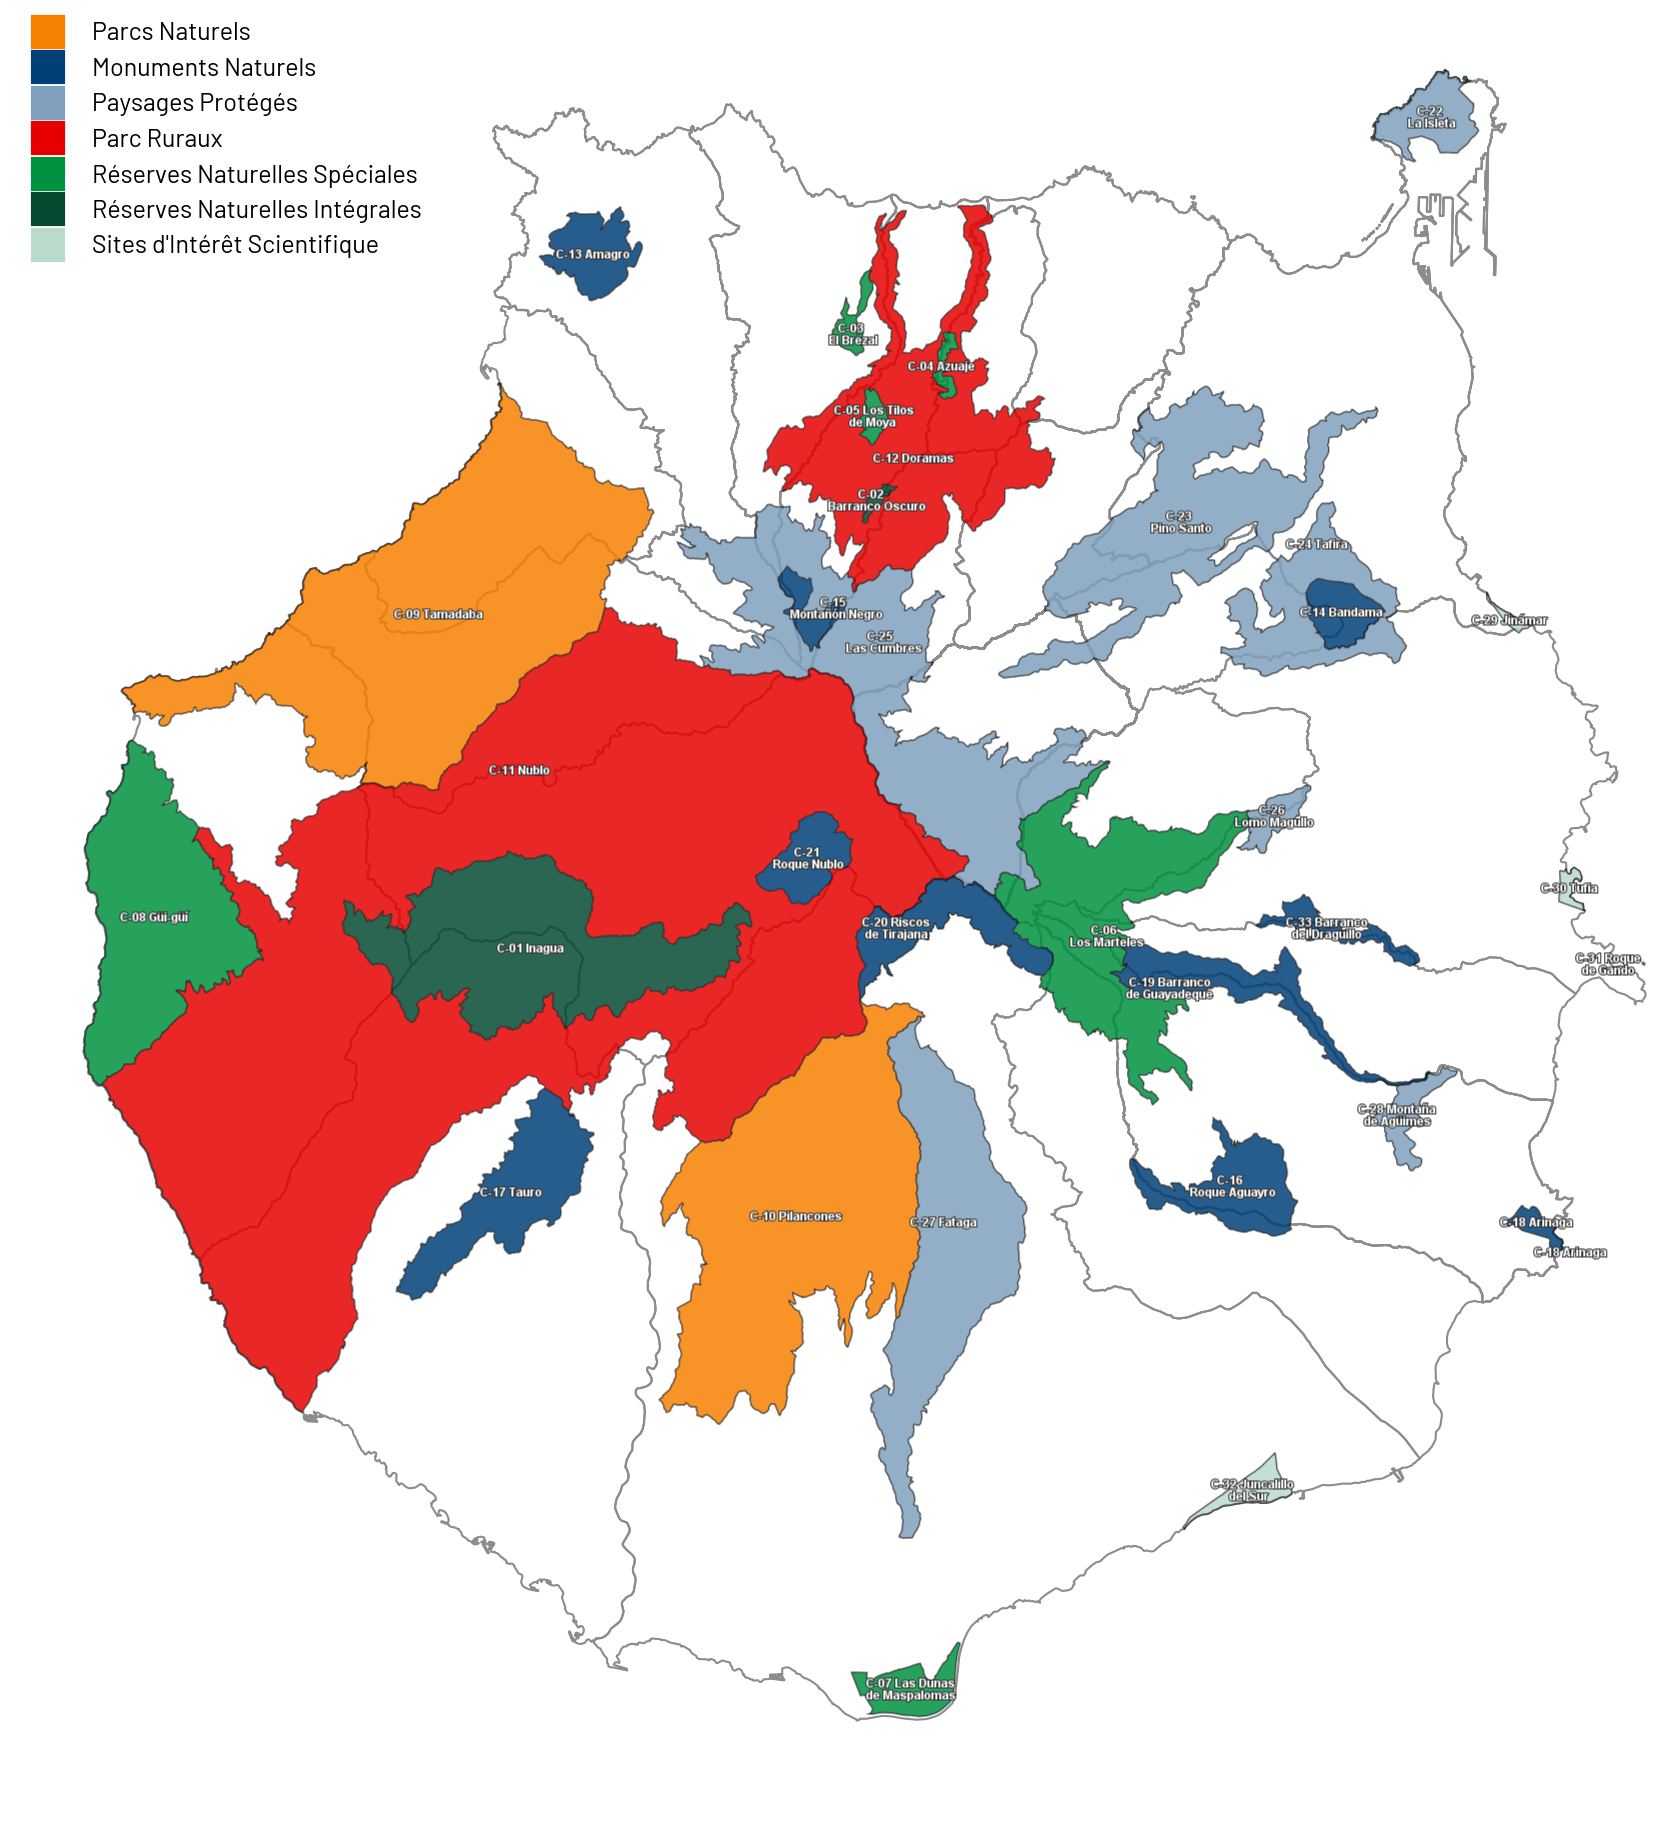

In [17]:
fig = plt.figure()
ax = plt.subplot(111, projection=GC.proj)

municipios.add_to_plot(ax, color='.55', linewidth=.5, zorder=4)


ax.add_wms(wms='https://idecan2.grafcan.es/ServicioWMS/EspNat?',
               layers=['EENN'],
               transform=GC.proj, zorder=5, alpha=.85)

ax.set_extent(GC.bbox)
ax.spines['geo'].set_color("w")
add_legend(colordictf, ax)

#plt.savefig(os.path.join(hikinggc.figdir, "GC_espaces_naturels06"))
plt.show()
plt.close()